# Section 1: Data Understanding and Extraction

## Section 1.1 Load Data

In [ ]:
!pip3 install statsbombpy

In [ ]:
#imports
from statsbombpy import sb
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

In [ ]:
def get_matches_and_events(competition_id,season_ids):
  """
  input:
  competition_id - an sb competition id
  season_ids - a list of sb season ids

  output:
  match_ids - a list of sb match ids for all matches in given seasons
  match_events - a dictionary of dataframes of events for each match
  """
  match_ids = []
  match_events = {}
  #get ids
  for season_id in season_ids:
    matches = sb.matches(competition_id=competition_id, season_id = season_id)
    match_ids += matches['match_id'].tolist()
    #get match events
    for i in range(matches.shape[0]):
      id = matches['match_id'][i]
      df = sb.events(id)
      df.loc[:, 'away_team'] = matches['away_team'][i]
      df.loc[:, 'home_team'] = matches['home_team'][i]
      match_events[id] = df

  return match_ids,match_events

In [ ]:
#extract data from all available seasons from La Liga (Spanish professional league)
#this often takes quite a while
laliga_season_ids = [42, 4, 1, 2, 27, 26, 25, 24, 23, 22, 21, 41, 40, 39, 38, 37]
#suppress output (stats bomb prints out each time you access events witout credentials)
save_stdout = sys.stdout
#sys.stdout = open('trash', 'w')
laliga_match_ids,laliga_match_events = get_matches_and_events(11,laliga_season_ids)
#reset stdout
sys.stdout = save_stdout
print("number of matches: ",len(laliga_match_ids))

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

In [ ]:
def events_vs_label_plot(dft, col):
  """
  Creates two plots:
    1. Plots percentage of the label (col) for each event
    2. Plots count of label (col) for each event
  """
  x = dft.groupby("type")[col].apply(lambda x: (x == 1).sum()).reset_index()
  y = dft.groupby("type")[col].apply(lambda x: (x == 0).sum()).reset_index()
  z = x.merge(y, how="outer",on=["type"],suffixes=["_true","_false"])
  z["percentage"] = z["{}_true".format(col)] / (z["{}_true".format(col)] + z["{}_false".format(col)]) * 100

  num_figures = 2
  fig, (ax, ax2) = plt.subplots(num_figures)
  fig.set_size_inches(18,7.5 * num_figures)
  #ax = plt.subplot(111)
  #ax2 = plt.subplot(211)


  ax.bar(z["type"], z["percentage"])
  ax.tick_params(rotation=45)

  ax.set_title("%s Percentage by Event"%col.capitalize())
  ax.set_ylabel("Percentage")
  ax.set_xlabel("Event Type")

  fig.show()

  ax2.bar(z["type"], z["{}_true".format(col)])
  ax2.tick_params(rotation=45)

  ax2.set_title("Number of Turnovers by Event")
  ax2.set_ylabel("Number of Turnovers")
  ax2.set_xlabel("Event Type")

  fig.show()

## Section 1.2 Passing Visualization

In [ ]:
# This cell adapted from
# https://fcpython.com/visualisation/drawing-pitchmap-adding-lines-circles-matplotlib
# where the coordinates were changed from 130 by 90 to 120 by 80
# The coordinates of the pitch are detailed from the Statsbomb Open Events Structure and Data Specification
from matplotlib.patches import Arc
def create_pitch():
    
    #Create figure
    fig=plt.figure()
    fig.set_size_inches(15,10)
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")
    
    #Left Penalty Area
    plt.plot([18,18],[18,62],color="black")
    plt.plot([0,18],[62,62],color="black")
    plt.plot([0,18],[18,18],color="black")
    
    #Right Penalty Area
    plt.plot([120,102],[18,18],color="black")
    plt.plot([120,102],[62,62],color="black")
    plt.plot([102,102],[18,62],color="black")
    
    #Left 6-yard Box
    plt.plot([0,6],[30,30],color="black")
    plt.plot([0,6],[50,50],color="black")
    plt.plot([6,6],[30,50],color="black")
    
    #Right 6-yard Box
    plt.plot([120,114],[30,30],color="black")
    plt.plot([120,114],[50,50],color="black")
    plt.plot([114,114],[30,50],color="black")
    
    #Prepare Circles
    centreCircle = plt.Circle((60,40),9.15,color="black",fill=False) # not sure about 9.15 factor
    centreSpot = plt.Circle((60,40),0.8,color="black")
    leftPenSpot = plt.Circle((12,40),0.8,color="black")
    rightPenSpot = plt.Circle((108,40),0.8,color="black")
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    #leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    #rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    #ax.add_patch(leftArc)
    #ax.add_patch(rightArc)
    
    #Tidy Axes
    #plt.axis('off')
    
    #Display Pitch
    #plt.show()  

    return fig, ax  
#create_pitch()

In [ ]:
## helper functions

def col_to_datetime(df, col):
  '''
  Input:
    df: dataframe with soccer event data
    col: column to convert to datetime (str)
  Returns:
    df: dataframe datetime column
  '''
  df[col] = pd.to_datetime(df[col])
  df[col] = df[col].apply(lambda x: x.time())
  return df

def display_all(df):
  """
  Displays entire dataframe nicely and then resets display options
  """
  pd.set_option("display.max_rows", None, "display.max_columns", None)
  display(df)
  pd.reset_option('display')

In [ ]:
from datetime import datetime, date, time
df = col_to_datetime(df, "timestamp")

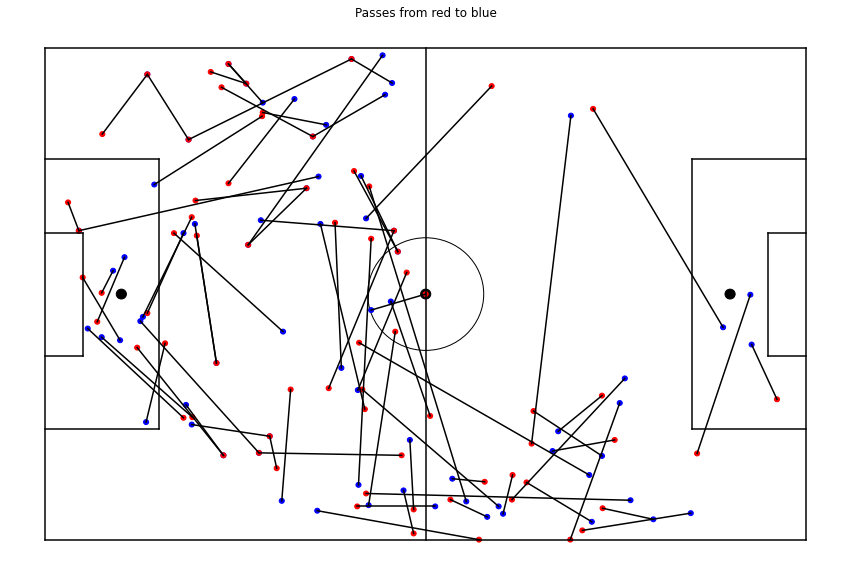

In [ ]:
def visualize_pass_locations(df):
  fig, ax = create_pitch()
  df = df[df["type"] == "Pass"]

  for index, row in df.iterrows():
    if (row["period"] == 1) and (row["timestamp"] <= time(0,5,0)):
      location = row["location"]
      x = location[0]
      y = location[1]
      start_loc = plt.Circle((x,y),0.4,color="red")
      ax.add_patch(start_loc)

      end_location = row["pass_end_location"]
      x2 = end_location[0]
      y2 = end_location[1]
      end_loc = plt.Circle((x2,y2),0.4,color="blue")
      ax.add_patch(end_loc)

      # plot lines between passes
      plt.plot([x,x2],[y,y2], color= "black")

  ax.set_title("Passes from red to blue")

  #Tidy Axes
  plt.axis('off')
    
  #Display Pitch
  plt.show()

visualize_pass_locations(df)

# Section 2: Data Analysis

Not all the games have exactly the same feature set for their events. Here we look at what features are shared by every game and how many games have each feature that is missing from at least one game.

In [ ]:
def find_parameter_frequency(ids,events):
  """
  input:
  ids - a list of sb match ids
  match_events - a dictionary of dataframes of events for each match
  output:
  shared_cols - a list of features shared across all match event dataframes
  missing_cols - a dictionary of features and how many dataframes they occur in
  """
  cols = {}
  #get appearances of all features across all dataframes
  for id in ids:
    df = events[id]
    for col in df.columns:
      if col in cols.keys():
        cols[col] += 1
      else:
        cols[col] = 1
  shared_cols = []
  #find which features are shared across all dataframes
  for key in cols.keys():
    if cols[key] == len(ids):
      shared_cols += [key]
  for key in shared_cols:
    cols.pop(key)
  missing_cols = cols
  return shared_cols,missing_cols

shared_cols,missing_cols = find_parameter_frequency(laliga_match_ids,laliga_match_events)

print('shared features: ',shared_cols)
print('inconsistent features: ',missing_cols)

shared features:  ['ball_receipt_outcome', 'carry_end_location', 'counterpress', 'dribble_outcome', 'duel_outcome', 'duel_type', 'duration', 'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location', 'match_id', 'minute', 'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross', 'pass_end_location', 'pass_height', 'pass_length', 'pass_outcome', 'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pass_type', 'period', 'play_pattern', 'player', 'player_id', 'position', 'possession', 'possession_team', 'possession_team_id', 'related_events', 'second', 'shot_body_part', 'shot_end_location', 'shot_freeze_frame', 'shot_key_pass_id', 'shot_outcome', 'shot_statsbomb_xg', 'shot_technique', 'shot_type', 'substitution_outcome', 'substitution_replacement', 'tactics', 'team', 'timestamp', 'type', 'under_pressure', 'away_team', 'home_

#Section 3: Data Preprocessing

Here we add our labels. "Turnovers" are not explicitly baked into each event, so we add it here by ordering the events and looking for places where the "possession_team" feature changes. So an event will have a 1 for "turnovers" if it results in a change in possession and a 0 otherwise.

## Section 3.1: Examine Turnover Frequency

In [ ]:
def add_turnovers(df):
  """
  input:
  df - a dataframe of match events
  output:
  df - a dataframe of match events sorted by event time with turnovers column
  """
  #sort by the time
  df = df.sort_values(by=['period','possession','timestamp'])
  df = df.reset_index(drop = "index")
  #don't look at play types that should not be the turnover cause
  bad_types = ['Ball Receipt*','Goal Keeper']
  df_pos = df[~df['type'].isin(bad_types)]
  #shift possessions by 1 to find change in possession
  left_df = df_pos['possession']
  right_df = df_pos['possession'].shift(-1)
  #find where possession changes
  turnovers = left_df != right_df
  #last possession will be NA, set this not to be a turnover
  turnovers[-1] = 0
  df['turnover'] = turnovers
  df = df.fillna(value={'turnover': 0})
  return df

credentials were not supplied. open data access only


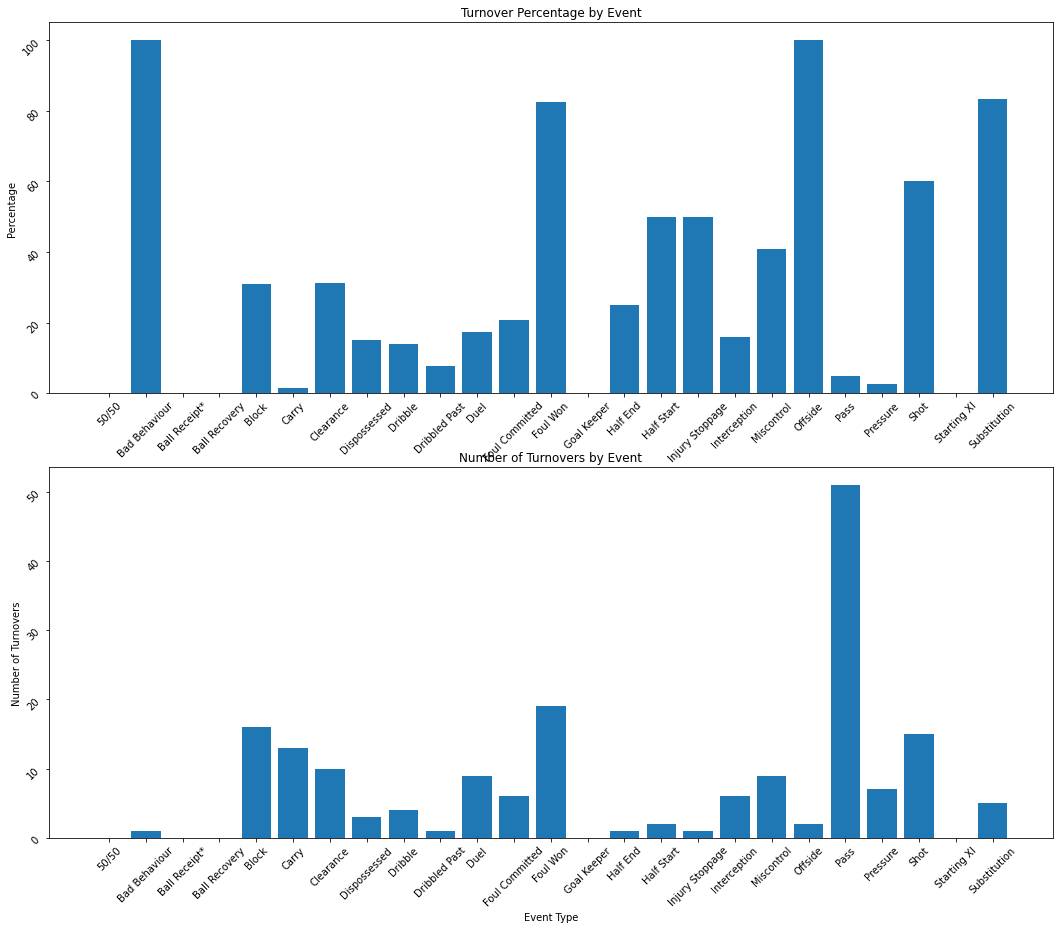

In [ ]:
df = sb.events(303731).copy() # pick a game
df = add_turnovers(df)
events_vs_label_plot(df, "turnover")

In [ ]:
df = laliga_match_events[laliga_match_ids[0]]
print("before adding turnovers: ",df.shape)
df = add_turnovers(df)
print("after adding turnovers: ",df.shape)
before_to = df['turnover'].shift(-1)
after_to = df['turnover'].shift(1)
#look at some turnover plays as well as the plays before and after
example_df = df.loc[(df['turnover'] == 1)|(before_to == 1)|(after_to == 1),['type','possession_team','team','possession','timestamp','turnover']]
example_df = example_df.reset_index(drop = "index")
example_df.loc[0:29]

before adding turnovers:  (3690, 91)
after adding turnovers:  (3690, 92)


,type,possession_team,team,possession,timestamp,turnover
0,Half Start,Barcelona,Barcelona,1,00:00:00.000,0.0
1,Half Start,Barcelona,Eibar,1,00:00:00.000,1.0
2,Pass,Barcelona,Barcelona,2,00:00:01.398,0.0
3,Ball Receipt*,Barcelona,Barcelona,2,00:00:40.744,0.0
4,Pass,Barcelona,Barcelona,2,00:00:42.078,1.0
5,Ball Receipt*,Barcelona,Barcelona,2,00:00:42.078,0.0
6,Miscontrol,Eibar,Eibar,3,00:01:11.132,0.0
7,Clearance,Eibar,Barcelona,3,00:01:11.959,1.0
8,Ball Recovery,Barcelona,Barcelona,4,00:01:13.699,0.0
9,Ball Receipt*,Barcelona,Barcelona,4,00:01:49.682,0.0


## Section 3.2: Feature Selection and Encoding

In [ ]:
## helper functions

def col_to_datetime(df, col):
  '''
  Input:
    df: dataframe with soccer event data
    col: column to convert to datetime (str)
  Returns:
    df: dataframe datetime column
  '''
  df[col] = pd.to_datetime(df[col])
  df[col] = df[col].apply(lambda x: x.time())
  return df

def display_all(df):
  """
  Displays entire dataframe nicely and then resets display options
  """
  pd.set_option("display.max_rows", None, "display.max_columns", None)
  display(df)
  pd.reset_option('display')

In [ ]:
MISSING_PLAYER_LOCATION = -100.0

def fillna_columns(df, cols):
  '''
  Input:
    df: dataframe with soccer event data
    cols: list of columns to fill na values with 0
  Returns:
    df: dataframe with soccer event data with na values filled
      for listed columns in cols
  '''
  for col in cols:
    df[col] = df[col].fillna(0)
    df[col] = df[col].apply(lambda x: 1 if x is True else 0)

  return df

def split_location(df, cols):
  '''
  Input:
    df: dataframe with soccer event data
    cols: list of columns to with location data stored as a list
  Returns:
    df: new dataframe with location x and location y columns for
      each column in columns
  '''
  for col in cols:
    df["%s_x"%col] = df[col].apply(lambda x: x[0] if type(x) == list else MISSING_PLAYER_LOCATION)
    df["%s_y"%col] = df[col].apply(lambda x: x[1] if type(x) == list else MISSING_PLAYER_LOCATION)
    df = df.drop(col,axis=1)
  return df

def handle_shot_freeze_frame(df):
  '''
  Input:
    df: dataframe with soccer event data
  Returns: 
    df: new dataframe with location_x, location_y, and teammate
      status for each player that could be on the field
  '''
  for player_num in range(0, 21): #for every other player on the field besides the one who shot
    df["shot_freeze_frame"] = df["shot_freeze_frame"].apply(
        lambda x: x if isinstance(x, list) else []) #convert to empty list of missing freeze frame

    # get player x location from freeze frame
    df["player_%d_location_x"%(player_num)] = df["shot_freeze_frame"].apply(
        lambda x: x[player_num]['location'][0] if (len(x) > player_num) else MISSING_PLAYER_LOCATION)
    
    # get player y location from freeze frame
    df["player_%d_location_y"%(player_num)] = df["shot_freeze_frame"].apply(
        lambda x: x[player_num]['location'][1] if (len(x) > player_num) else MISSING_PLAYER_LOCATION)
    
    # get player teammate information from freeze frame
    df["player_%d_teammate"%(player_num)] = df["shot_freeze_frame"].apply(
        lambda x: x[player_num]['teammate'] if (len(x) > player_num) else 0 )
    
    # ensure teammate is 1's and 0's and not True or False
    df["player_%d_teammate"%(player_num)] = df["shot_freeze_frame"].apply(lambda x: 1 if x is True else 0 )

  # drop original freeze frame
  df = df.drop("shot_freeze_frame",axis=1)
  return df


In [ ]:
def feature_selection_and_encoding(df):
  '''
  Selects all features of interest and cleans 
  the dataframe

  Input:
    df: datafram with raw soccer data
  Returns:
    df: cleaned dataframe with all features of interest, missing
      data updated, and one hot encoding on categorical features
  '''

  # we only care about the following event types: Dribble, Pass, Shot
  df = df.loc[df["type"].isin(["Dribble", "Pass", "Shot"])]

  ### DRIBBLE FEATURES
  # dribble_nutmeg: boolean
  # dribble_outcome: "Complete" or "Incomplete"
  dribble_features = ["dribble_nutmeg","dribble_outcome"]


  ### PASS FEATURES
  # pass_aerial_won: boolean
  # pass_angle: float
  # pass_body_part: "Drop Kick", "Head", "Keeper Arm", "Left Foot", "Other", "Right Foot", "No Touch"
  # pass_cross: boolean
  # pass_cut_back: boolean
  # pass_end_location: list
  # pass_height: "Ground Pass", "Low Pass", "High Pass"
  # pass_inswinging: boolean
  # pass_length: float (in yards)
  # pass_miscommunication: boolean
  # pass_outswinging: boolean
  # pass_straigth: boolean
  # pass_switch: boolean
  # pass_through_ball: boolean
  # pass_type: "Corner", "Free Kick", "Goal Kick", "Interception", "Kick Off", "Recovery", "Throw-in"
  pass_features = ["pass_aerial_won", "pass_angle","pass_body_part", "pass_cross","pass_cut_back",
                  "pass_end_location","pass_height","pass_inswinging","pass_length","pass_miscommunication",
                  "pass_outswinging","pass_straight","pass_switch","pass_through_ball","pass_type"]


  ### SHOT FEATURES
  # shot_body_part: "Head","Left Foot","Other","Right Foot"
  # shot_end_location: array (x,y) or (x,y,z) # probably do not need
  # shot_first_time: boolean
  # shot_freeze_frame: dict with keys
  # location: list of 2 elements
  # player: dict of 'id' and 'name'
  # position: dict of 'id' and 'name'
  # teammate: boolean
  # shot_key_pass_id # probably do not need
  # shot_one_on_one: boolean
  # shot_open_goal: boolean (probably do not need)
  # shot_technique: "Backheel", "Diving Header", "Half Volley", "Lob", "Normal", "Overhead Kick", "Volley"
  # shot_type: "Corner", "Free Kick", "Open Play", "Penalty", "Kick Off"

  shot_features = ["shot_body_part","shot_first_time","shot_freeze_frame","shot_one_on_one",
                  "shot_open_goal","shot_technique","shot_type"]


  ### OTHER FEATURES
  # duration: float
  # period: 1 or 2
  # timestamp: datetime after conversion
  # home_team / away_team, team, possession_team:
  # possession: int
  # turnover: boolean

  # adjust team information
  pos = df['home_team'] == df['possession_team']
  df['possession_team'] = pos.astype(int)
  team = df['home_team'] == df['team']
  df['team'] = team.astype(int)

  #NOTE: removed timestamp and added minute and second because KNN won't convert timestamp to float
  other_features = ["type","location", "duration","period","minute","second","home_team","away_team", "team","possession_team","possession","turnover"]

  # convert timestamp to datatime
  df = col_to_datetime(df, "timestamp")

  features = other_features + dribble_features + pass_features + shot_features

  #add missing features
  for feature in features:
    if feature not in df.columns:
      df[feature] = np.zeros #maybe fill with NaN?

  # We only keep the above features and do not worry about anything else
  df = df[features]

  # One hot encoding for categorical features
  df = pd.get_dummies(df, columns=["type","home_team","away_team","dribble_outcome","pass_body_part","pass_height","pass_type",
                                "shot_technique", "shot_type"])

  # fill in all features with na values
  na_features = ["dribble_nutmeg","pass_aerial_won","pass_cross","pass_cut_back",
                    "pass_inswinging","pass_miscommunication","pass_outswinging",
                    "pass_straight","pass_switch","pass_through_ball","shot_body_part",
                    "shot_first_time","shot_one_on_one","shot_open_goal"]

  df = fillna_columns(df, na_features)

  # separate location data array into two separate columns for each location feature
  location_cols = ["pass_end_location","location"]
  df = split_location(df, location_cols)

  # separate the shot freeze frame so that each feature holds individual player information
  # whenever a shot occurs
  df = handle_shot_freeze_frame(df)

  return df

## Section 3.3: Cleaned Data (Sample)

In [ ]:
# Show final cleaned dataframe
fdf = feature_selection_and_encoding(df)
fdf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,duration,period,minute,second,team,possession_team,possession,turnover,dribble_nutmeg,pass_aerial_won,pass_angle,pass_cross,pass_cut_back,pass_inswinging,pass_length,pass_miscommunication,pass_outswinging,pass_straight,pass_switch,pass_through_ball,shot_body_part,shot_first_time,shot_one_on_one,shot_open_goal,type_Dribble,type_Pass,type_Shot,home_team_Barcelona,away_team_Eibar,dribble_outcome_Complete,dribble_outcome_Incomplete,pass_body_part_Head,pass_body_part_Keeper Arm,pass_body_part_Left Foot,pass_body_part_No Touch,pass_body_part_Other,pass_body_part_Right Foot,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass,...,player_7_teammate,player_8_location_x,player_8_location_y,player_8_teammate,player_9_location_x,player_9_location_y,player_9_teammate,player_10_location_x,player_10_location_y,player_10_teammate,player_11_location_x,player_11_location_y,player_11_teammate,player_12_location_x,player_12_location_y,player_12_teammate,player_13_location_x,player_13_location_y,player_13_teammate,player_14_location_x,player_14_location_y,player_14_teammate,player_15_location_x,player_15_location_y,player_15_teammate,player_16_location_x,player_16_location_y,player_16_teammate,player_17_location_x,player_17_location_y,player_17_teammate,player_18_location_x,player_18_location_y,player_18_teammate,player_19_location_x,player_19_location_y,player_19_teammate,player_20_location_x,player_20_location_y,player_20_teammate
4,0.758743,1,0,1,1,1,2,0.0,0,0,-2.848004,0,0,0,8.984431,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,...,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0
7,2.356450,1,0,3,1,1,2,0.0,0,0,-1.718646,0,0,0,28.511051,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,...,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0
10,0.992122,1,0,6,1,1,2,0.0,0,0,0.000000,0,0,0,12.300000,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,...,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0
13,0.769468,1,0,8,1,1,2,0.0,0,0,1.623844,0,0,0,11.315918,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,...,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0
17,1.901346,1,0,9,1,1,2,0.0,0,0,3.123817,0,0,0,22.503555,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,...,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,1.206236,2,91,49,1,1,184,0.0,0,0,1.219351,0,0,0,19.171854,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,...,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0
3677,1.181713,2,91,50,1,1,184,0.0,0,0,-1.861787,0,0,0,20.564533,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,...,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-100.0,0,-100.0,-10

## Section 3.4: Join Game Events - Creating the Full Dataframe

In [ ]:
def join_game_events(ids,events,max_ids = None):
  """
  input:
  ids - a list of sb match ids
  match_events - a dictionary of dataframes of events for each match
  max_ids - set a maximum number of games to join together
  output:
  all_events - a df of events from all matches with turnover column
  """

  #get first set of events
  df = events[ids[0]]
  df = add_turnovers(df)
  df = feature_selection_and_encoding(df)
  all_events = df
  if max_ids == None:
    max_ids = len(ids)
  
  for i in range(1,len(ids)):
    if i >= max_ids:
      break
    #join each game's events with the rest
    df = events[ids[i]]
    df = add_turnovers(df)
    df = feature_selection_and_encoding(df)
    all_events = pd.concat([all_events,df])
  return all_events

In [ ]:
def load_file_of_joined_events(filename,ids, events):
  if not os.path.exists(filename):
    joined_events = join_game_events(ids,events)
    joined_events.to_csv(filename, index=False)
  else:
    joined_events = pd.read_csv(filename)

  print(joined_events.shape)

  return joined_events

In [ ]:
joined_events = load_file_of_joined_events("all_la_liga_events_with_ids2.csv",None,None)
joined_events_wc =load_file_of_joined_events("world_cup_events2.csv", None, None)

(528421, 46)
(64990, 45)


In [ ]:
# if not os.path.exists("all_la_liga_events.csv"):
#   joined_events = join_game_events(laliga_match_ids,laliga_match_events)
#   joined_events.to_csv("all_la_liga_events.csv", index=False)
# else:
#   joined_events = pd.read_csv("all_la_liga_events.csv")

# print(joined_events.shape)

Streaming output truncated to the last 5000 lines.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: SettingWithCop

(540424, 202)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def split_data(df,y_col):

  #fill NaN vals
  df = df.fillna(0)

  #make equal positive and negative points
  '''
  df_1 = df[df[y_col] == 1]
  df_0 = df[df[y_col] == 0]
  df_0 = df_0.sample(n=len(df_1),random_state=64)
  df = pd.concat([df_1,df_0])
  '''

  #split into features and labels
  X = df.loc[:,df.columns!=y_col].values
  y = df.loc[:,y_col].values

  #train,test split
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

  #Scale the features of X_train and X_test using scaler
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.fit_transform(X_test)

  return X_train, X_test, y_train, y_test

# Section 4: Machine Learning Applications

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#get data
X_train, X_test, y_train, y_test = split_data(joined_events)

#train,val split
(X_train, X_val, y_train, y_val) = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

train_f1 = []
val_f1 = []

k_values = range(1, 16, 1)
#loop over various values of `k` for the k-Nearest Neighbor classifier
for k in k_values:
  print(k)
  #Create a KNN Model
  model = KNeighborsClassifier(n_neighbors= k, p = 2)
  #Fit the KNN model to the data
  model.fit(X_train, y_train)
  #Add the f1 scores to the lists created above
  report = classification_report(y_train, model.predict(X_train),output_dict=True)
  train_f1.append(report['1.0']['f1-score'])
  print(report['1.0']['f1-score'])
  report = classification_report(y_val, model.predict(X_val),output_dict=True)
  val_f1.append(report['1.0']['f1-score'])
  print(report['1.0']['f1-score'])
     
print(train_accuracies)
print(valid_accuracies)

[1.0, 0.8499705478107206, 0.8523267229530729, 0.8193795405458473, 0.8200667582957, 0.8047712546632633, 0.8063027685057923, 0.797565285686236, 0.798488120950324, 0.7918515609660318, 0.7925976830944433, 0.7879638719811506, 0.788749263695268, 0.7834282348321225, 0.7842136265462399]
[0.6997702774341756, 0.7001236967662131, 0.7345820816398657, 0.7257465983389292, 0.7437709842728397, 0.7335218236437533, 0.7446545326029334, 0.74094362961654, 0.7478353065912705, 0.7450079519349708, 0.7526064675737762, 0.7536667255698887, 0.7561406608941509, 0.75349001590387, 0.7545502738999823]


In [ ]:
import plotly.graph_objects as go
k_values = range(1, 16, 1)

fig = go.Figure()
fig.add_trace(go.Scatter(x = list(k_values), 
                        y = val_f1,
                        mode='lines',
                        name='f1-score, Validation'))
'''
fig.add_trace(go.Scatter(x = list(k_values), 
                        y = train_f1,
                        mode='lines',
                        name='f1-score, Training'))
                        '''
fig.update_layout(title='F1-Score v.s. K Values',
                  yaxis_title='F1-Score',
                  xaxis_title='K Values'
                  )
fig.show()

In [ ]:
from sklearn.metrics import classification_report
#train classifier with best accuracy
model = KNeighborsClassifier(n_neighbors=3, p=2)
model.fit(X_train, y_train)

#generate classification report
report = classification_report(y_test, model.predict(X_test))

print("EVALUATION ON TESTING DATA")
print(report)

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

         0.0       0.74      0.79      0.76      9529
         1.0       0.77      0.72      0.74      9334

    accuracy                           0.75     18863
   macro avg       0.76      0.75      0.75     18863
weighted avg       0.76      0.75      0.75     18863



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

#get data
X_train, X_test, y_train, y_test = split_data(joined_events)

depths = [10,20,None]
estimators = [50,100,200,300]

all_scores = []
#find best hyperparameters
for depth in depths:
  for n in estimators:
    model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
    scores = cross_validate(model, X_train, y_train, cv=5, scoring='f1')
    all_scores.append(scores)
    print(depth," ",n," ",scores['test_score'])

In [ ]:
from sklearn.metrics import classification_report
#train classifier
model = RandomForestClassifier(n_estimators=200, max_depth=100, random_state=42)
model.fit(X_train, y_train)

#generate classification report
report = classification_report(y_test, model.predict(X_test))

print("EVALUATION ON TESTING DATA")
print(report)

In [ ]:
importances = model.feature_importances_
for i in range(10):
  index = np.argmax(importances)
  print(joined_events.columns[index]," ",max(importances))
  importances[index] = 0

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def split_data_adj(df,y_col):

  #fill NaN vals
  df = df.fillna(0)

  #make equal positive and negative points
  # df_1 = df[df[y_col] == 1]
  # df_0 = df[df[y_col] == 0]
  # df_0 = df_0.sample(n=len(df_1),random_state=64)
  # df = pd.concat([df_1,df_0])

  #match_ids = df["match_id"]
  save_cols_for_later = ["match_id","period","minute","second","team","possession_team",
                         "possession"]

  drop_df = df[save_cols_for_later]
  df = df.drop(save_cols_for_later, axis=1)

  #df = df.drop("match_id",axis=1)
  drop_columns = [i for i in df.columns if "home_team" in i or "away_team" in i]
  df = df.drop(drop_columns, axis = 1)

  drop_columns = [i for i in df.columns if "shot" in i or "player_" in i]
  df = df.drop(drop_columns, axis = 1)

  df_columns = df.columns
  #split into features and labels
  X = df.loc[:,df.columns!=y_col]
  y = df.loc[:,y_col] 

  #train,test split
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

  return X_train, X_test, y_train, y_test, drop_df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def split_data_wc(df,y_col):

  #fill NaN vals
  df = df.fillna(0)

  match_ids = df["match_id"]
  save_cols_for_later = ["match_id","period","minute","second","team","possession_team",
                         "possession"]

  drop_df = df[save_cols_for_later]
  df = df.drop(save_cols_for_later, axis=1)

  #df = df.drop("match_id",axis=1)
  drop_columns = [i for i in df.columns if "home_team" in i or "away_team" in i]
  df = df.drop(drop_columns, axis = 1)

  drop_columns = [i for i in df.columns if "shot" in i or "player_" in i]
  df = df.drop(drop_columns, axis = 1)
  df["pass_body_part_No Touch"] = 0 # column missing from world cup dataset. Set to zero

  #split into features and labels
  X_test = df.loc[:,df.columns!=y_col]
  y_test = df.loc[:,y_col]

  return X_test, y_test, drop_df

In [ ]:
def run_logreg(X_train, y_train, X_test, y_test):
  lr_clf = LogisticRegression(penalty='l2', tol=.1, max_iter=10000)
  lr_clf.fit(X_train, y_train)
  return lr_clf

def evaluate_model(X_train, y_train, X_test, y_test, model_name, clf):
  #generate classification report
  report = classification_report(y_test, clf.predict(X_test))

  print("EVALUATION ON TESTING DATA")
  print(report)

  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)
  acc_train = accuracy_score(y_train, y_pred_train)
  acc_test = accuracy_score(y_test, y_pred_test)
  print("Training Accuracy: %7.3f | Testing Accuracy: %7.3f"%(acc_train,acc_test))

  y_pred_prob = clf.predict_proba(X_test)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[::,1])
  auc = roc_auc_score(y_test, y_pred_prob[::,1])
  plt.xlabel("False Positive Rate (Positive Label: 1.0)")
  plt.ylabel("True Positive Rate (Positive Label: 1.0)")
  plt.title("Performance on Test Data")
  plt.plot(fpr, tpr)
  plt.legend(["%s (AUC = %5.2f)"%(model_name,auc)])
  plt.show()

def evaluate_model_wc(X_test_wc, y_test_wc, model_name, clf, cols):
  #generate classification report
  X_test_wc = X_test_wc[cols]
  report = classification_report(y_test_wc, clf.predict(X_test_wc))

  print("EVALUATION ON TESTING DATA")
  print(report)

  y_pred_wc = clf.predict(X_test_wc)
  acc_test = accuracy_score(y_test_wc, y_pred_wc)
  print("Testing Accuracy: %7.3f"%(acc_test))


  y_pred_prob_wc = clf.predict_proba(X_test_wc)

  fpr, tpr, thresholds = roc_curve(y_test_wc, y_pred_prob_wc[::,1])
  auc = roc_auc_score(y_test_wc, y_pred_prob_wc[::,1])
  plt.plot(fpr, tpr)
  plt.xlabel("False Positive Rate (Positive Label: 1.0)")
  plt.ylabel("True Positive Rate (Positive Label: 1.0)")
  plt.title("Performance on Test Data")
  plt.legend(["%s (AUC = %5.2f)"%(model_name,auc)])
  plt.show()

  return y_pred_wc, y_pred_prob_wc


In [ ]:
def check_turnover_results(X_test_wc, y_test_wc, y_pred_wc, y_pred_prob_wc, drop_df_wc):
  df_wc = X_test_wc.copy()
  df_wc = df_wc.join(drop_df_wc,how='outer')

  df_wc["turnover_actual"] = y_test_wc
  df_wc["turnover_pred"] = y_pred_wc
  df_wc["turnover_pred_prob"] = y_pred_prob_wc[::,1]

  df_wc1 = df_wc.groupby(["match_id","possession_team"])["turnover_actual"].sum().reset_index()
  df_wc2 = df_wc.groupby(["match_id","possession_team"])["turnover_pred"].sum().reset_index()
  df_wc3 = df_wc.groupby(["match_id","possession_team"])["turnover_pred_prob"].sum().reset_index()

  df_wc["cum_turnover_pred_prob"] = df_wc.groupby(["match_id","possession_team"])["turnover_pred_prob"].cumsum()

  for i in range(0,2):
    plt.figure(figsize=(18,10))

    df_01 = df_wc1[df_wc1["possession_team"] == i]
    df_02 = df_wc2[df_wc1["possession_team"] == i]
    df_03 = df_wc3[df_wc1["possession_team"] == i]

    plt.scatter(df_01["match_id"].astype('str'),df_01["turnover_actual"],alpha=0.5)
    plt.scatter(df_02["match_id"].astype('str'),df_02["turnover_pred"],alpha=0.5)
    plt.scatter(df_03["match_id"].astype('str'),df_03["turnover_pred_prob"],alpha=0.5)

    # plt.scatter(df_wc2["match_id"].astype('str'),df_wc2["turnover_pred"], alpha=0.5)
    # plt.scatter(df_wc3["match_id"].astype('str'),df_wc3["turnover_pred_prob"], alpha=0.5)
    plt.legend(["turnover_actual","turnover_pred","turnover_pred_prob"])
    plt.xlabel("Match ID")
    plt.ylabel("Number of Turnovers")
    if i == 0:
      team = "Away Team"
    else:
      team = "Home Team"
    plt.title("Types of Turnovers By World Cup Match For %s"%team)
    plt.xticks(rotation=90)
    plt.show()

  return df_wc

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

#get data
X_train, X_test, y_train, y_test, drop_df = split_data_adj(joined_events,"turnover")

In [ ]:
lr_clf = run_logreg(X_train, y_train, X_test, y_test)

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    124457
         1.0       0.42      0.05      0.09      7649

    accuracy                           0.94    132106
   macro avg       0.68      0.52      0.53    132106
weighted avg       0.91      0.94      0.92    132106

Training Accuracy:   0.940 | Testing Accuracy:   0.941


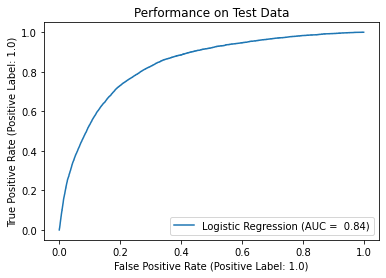

In [ ]:
evaluate_model(X_train, y_train, X_test, y_test, "Logistic Regression", lr_clf)

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     61422
         1.0       0.36      0.05      0.09      3568

    accuracy                           0.94     64990
   macro avg       0.65      0.52      0.53     64990
weighted avg       0.92      0.94      0.92     64990

Testing Accuracy:   0.943


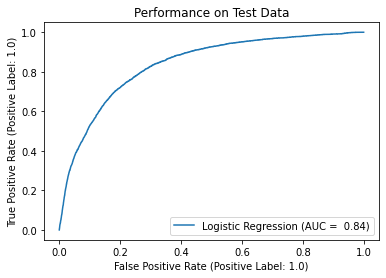

In [ ]:
X_test_wc, y_test_wc, drop_df_wc = split_data_wc(joined_events_wc,"turnover")
y_pred_wc, y_pred_prob_wc = evaluate_model_wc(X_test_wc, y_test_wc, "Logistic Regression", lr_clf, X_train.columns)

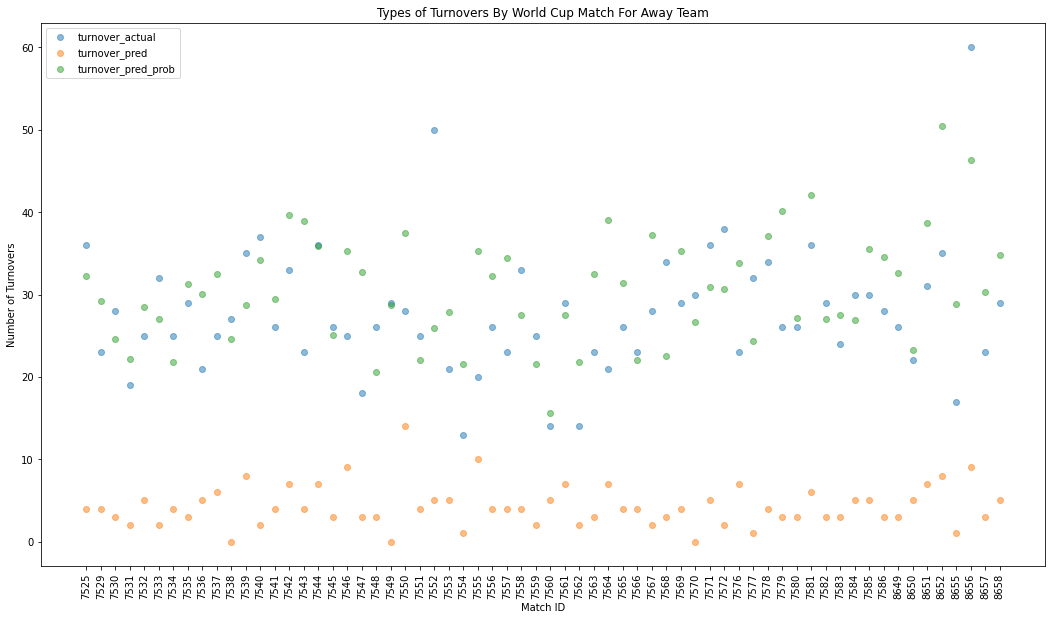

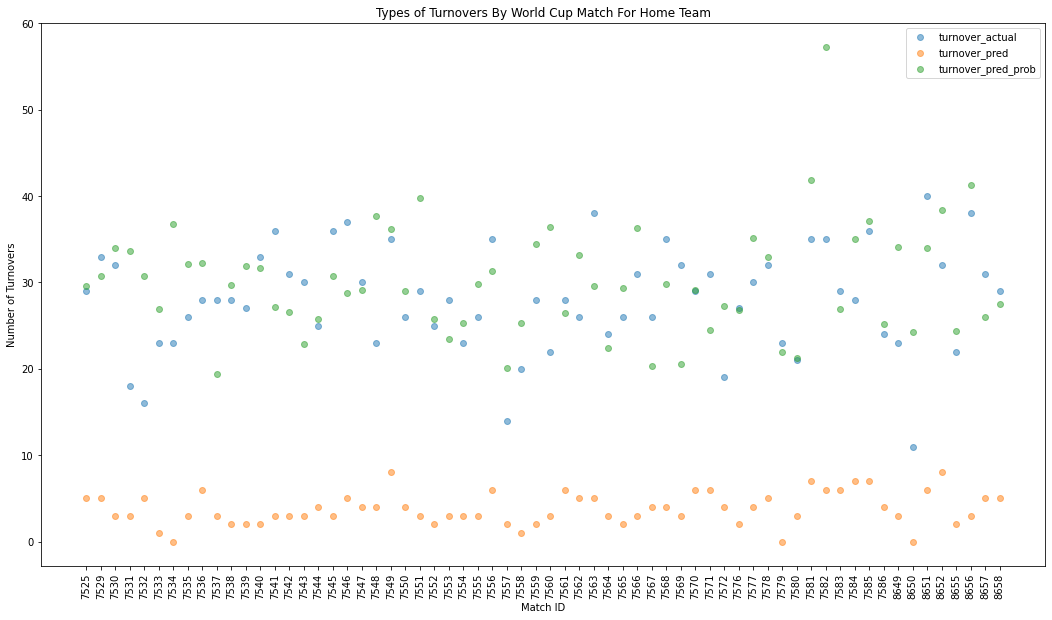

In [ ]:
df_wc_logreg = check_turnover_results(X_test_wc, y_test_wc, y_pred_wc, y_pred_prob_wc, drop_df_wc)

# Gradient Boosting

In [ ]:
import xgboost as xgb
import sklearn.metrics
import pandas as pd
import numpy as np
from tqdm import tqdm

def run_xgboost(X_train, y_train):
  dtrain = xgb.DMatrix(data=X_train, label=y_train)

  cls = xgb.XGBClassifier(objective="binary:logistic", 
                          n_boosting_rounds=10,
                          learning_rate = 0.5,
                          max_depth = 5,
                          gamma = 1,
                          tree_method="exact"

                          )
  cls.fit(X_train, y_train)

  return cls

In [ ]:
cls = run_xgboost(X_train, y_train)

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    124457
         1.0       0.69      0.25      0.37      7649

    accuracy                           0.95    132106
   macro avg       0.82      0.62      0.67    132106
weighted avg       0.94      0.95      0.94    132106

Training Accuracy:   0.954 | Testing Accuracy:   0.950


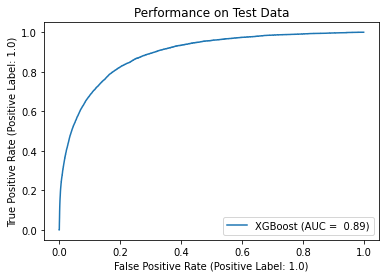

In [ ]:
evaluate_model(X_train, y_train, X_test, y_test, "XGBoost", cls)

#Section 5: Analysis - World Cup Final


EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     61422
         1.0       0.67      0.33      0.45      3568

    accuracy                           0.95     64990
   macro avg       0.82      0.66      0.71     64990
weighted avg       0.95      0.95      0.95     64990

Testing Accuracy:   0.954


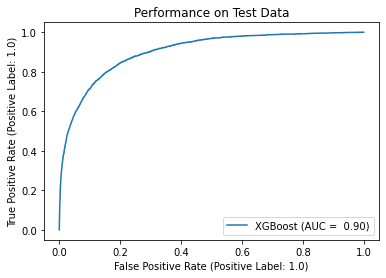

In [ ]:
y_pred_wc_boost, y_pred_prob_wc_boost = evaluate_model_wc(X_test_wc, y_test_wc, "XGBoost", cls, X_train.columns)

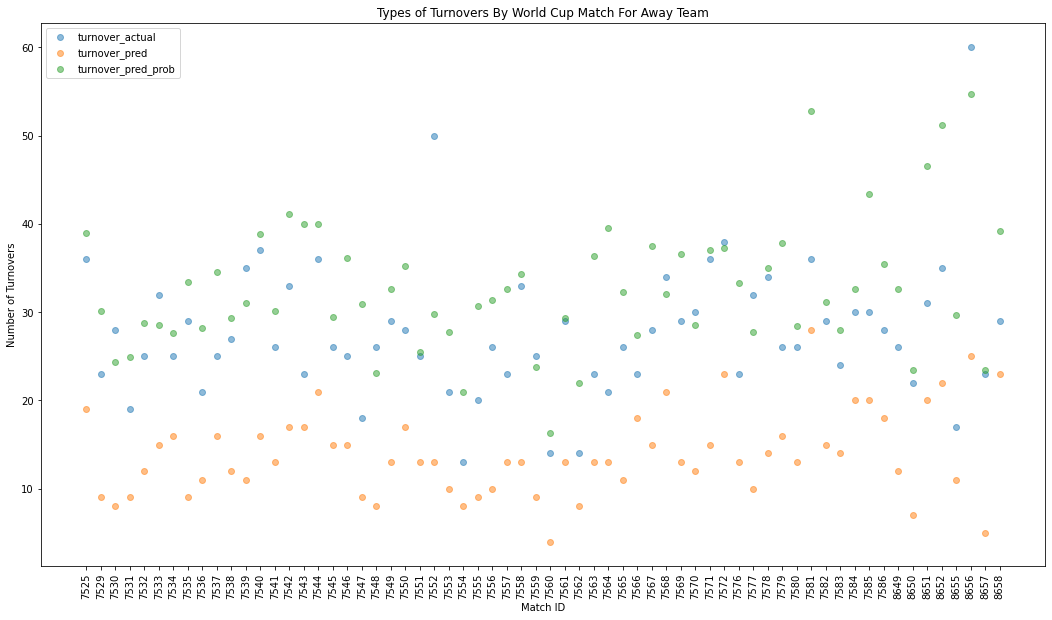

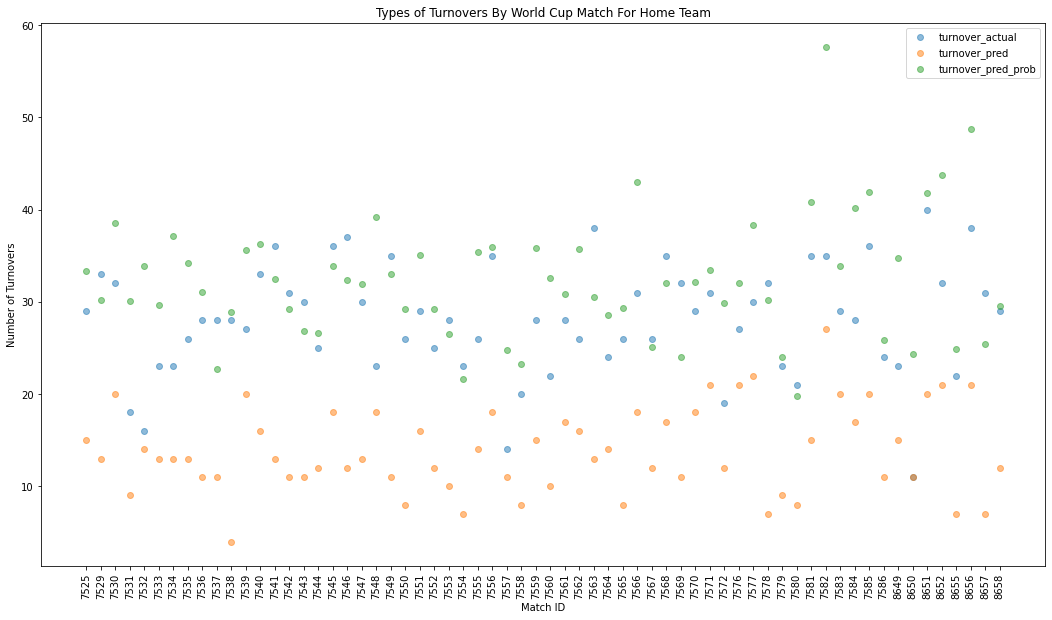

In [ ]:
df_wc_xgb = check_turnover_results(X_test_wc, y_test_wc, y_pred_wc_boost, y_pred_prob_wc_boost, drop_df_wc)

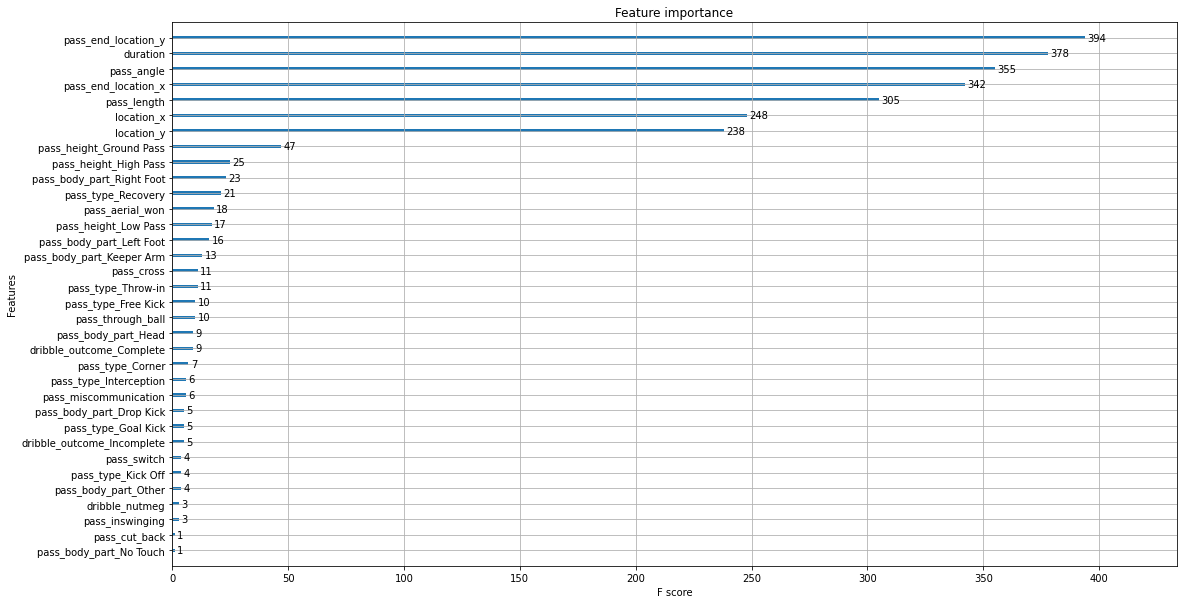

In [ ]:
ax = xgb.plot_importance(cls)
fig = ax.figure
fig.set_size_inches(18,10)

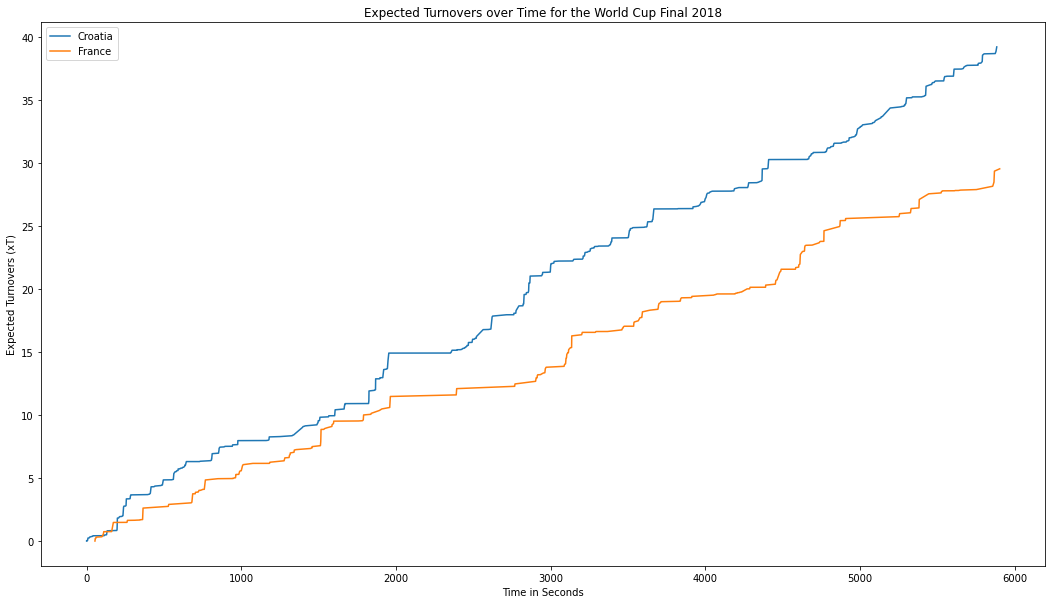

In [ ]:
# Focus on specific game
from datetime import datetime, timedelta, time
w = df_wc_xgb.copy()

w = w[w["match_id"] == 8658] # World Cup Final 2018 match id
w

plt.figure(figsize=(18,10))
max_period1 = w[w["period"] == 1]["minute"].max()
w["timestamp"] = w.apply(lambda x: x.minute*60 + x.second if x.period == 1 else x.minute*60 + x.second + 3*60+23, axis=1) # handle period change

plt.plot(w[w["possession_team"] == 0]["timestamp"],w[w["possession_team"] == 0]["cum_turnover_pred_prob"])
plt.plot(w[w["possession_team"] == 1]["timestamp"],w[w["possession_team"] == 1]["cum_turnover_pred_prob"])
plt.xlabel("Time in Seconds")
plt.ylabel("Expected Turnovers (xT)")
plt.title("Expected Turnovers over Time for the World Cup Final 2018")
plt.legend(["Croatia","France"])
plt.show()